In [ ]:
# Sai Triveni Kottapalli
# ID - C00313481  

# Support Vector Machines

Support vector machines (SVMs) are a powerful and flexible class of supervised algorithms used for both classification and regression. Here, we will explore the intuition behind SVMs and their application in classification problems.

We begin with the standard imports:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## Motivating Support Vector Machines

SVM is an exciting algorithm and the concepts are relatively simple. The classifier separates data points using a hyperplane 
with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an 
optimal hyperplane which helps in classifying new data points

Consider the simple case of a classification task where the two classes of points are well separated.

In [3]:
# changed no. of samples to 100, cluster_std = 0.50
# plotting scatter plot more efficiently by adding labels and changing colors

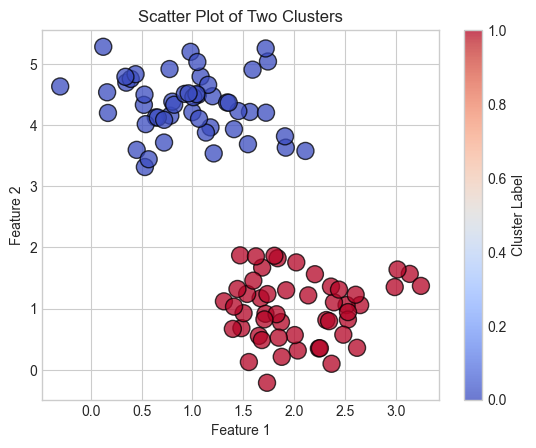

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.50)
plt.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='coolwarm', edgecolors='k', alpha=0.75)
plt.title("Scatter Plot of Two Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

A linear discriminative classifier aims to draw a straight line to separate two sets of data for classification. In two-dimensional data, this can be done manually. However, multiple dividing lines can perfectly distinguish between the two classes, as shown in the following figure.

In [5]:
# changed no. of samples to 100, cluster_std = 0.50
# plotting scatter plot more efficiently by adding labels and changing colors

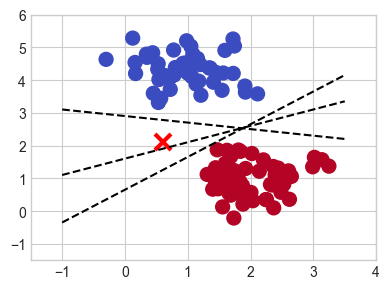

In [6]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(4,3))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=3, markersize=12)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '--k')

plt.xlim(-1.5, 4)
plt.ylim(-1.5, 6) 
plt.grid(True)
plt.tight_layout()
plt.show()

These are three *very* different separators which, nevertheless, perfectly discriminate between these samples.
Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label!
Evidently our simple intuition of "drawing a line between classes" is not good enough, and we need to think a bit more deeply.

## Support Vector Machines: Maximizing the Margin

Support vector machines offer one way to improve on this.
The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a *margin* of some width, up to the nearest point.
Here is an example of how this might look:

In [7]:
# changed no. of samples to 100, cluster_std = 0.50
# changing the xfit = np.linspace(-1.5, 3.5) to xfit = np.linspace(-1.5, 4) 
# plotting scatter plot more efficiently by adding labels and changing colors

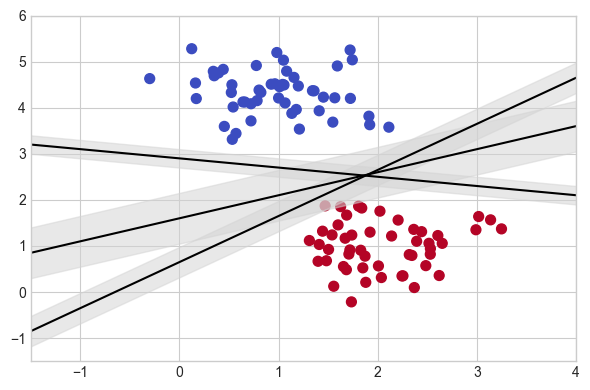

In [8]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.50)

xfit = np.linspace(-1.5, 4) 
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='lightgray', alpha=0.5)

plt.xlim(-1.5, 4)
plt.ylim(-1.5, 6)  

plt.tight_layout()
plt.grid(True)
plt.show()

The line that maximizes this margin is the one we will choose as the optimal model.

### Fitting a Support Vector Machine

Let's examine the results of fitting an actual model to this data. We will use Scikit-Learn's Support Vector Classifier (SVC) to train a Support Vector Machine (SVM) model. For now, we will utilize a linear kernel and set the parameter "C" to a very large value. 

We will discuss the significance of these choices in more detail shortly.

In [9]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [10]:
# creating grid to evaluate model
# plotting support vectors

In [11]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    ax = ax or plt.gca()
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    x, y = np.linspace(*xlim, 30), np.linspace(*ylim, 30)
    Y, X = np.meshgrid(y, x)
    P = model.decision_function(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)

    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, 
                   edgecolors='black', facecolors='none', linewidth=1)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

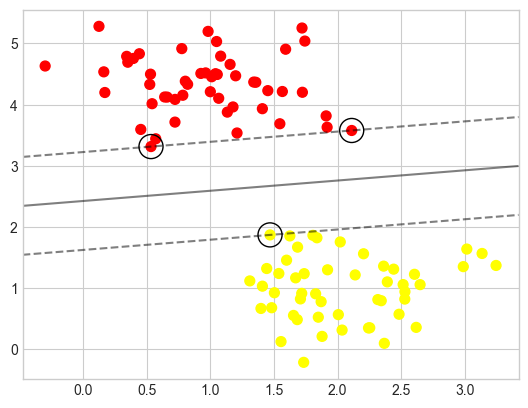

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

This line serves to maximize the margin between the two sets of points. Notice that some of the training points just touch the margin, which are circled in the figure below. These points are crucial to the model's fit; they are called *support vectors*, and they give the algorithm its name. In Scikit-Learn, the identities of these points are stored in the `support_vectors_` attribute of the classifier.

In [13]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

A key factor in the success of this classifier is that, during the fitting process, only the positions of the support vectors are important. Points that are farther from the margin and correctly classified do not affect the fitting. This is because these points do not contribute to the loss function used in model fitting, meaning their position and quantity are irrelevant as long as they do not cross the margin.

We can see this, for example:

In [14]:
# changed no. of samples to 100, cluster_std = 0.50
# plotting scatter plot more efficiently by adding labels and changing colors

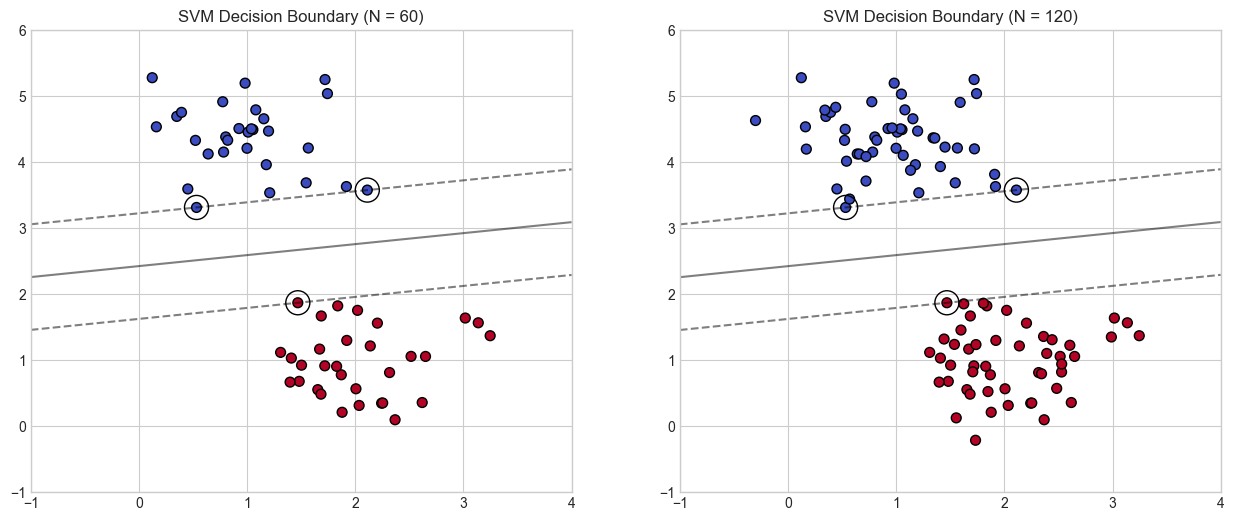

In [15]:
def plot_svm(N=10, ax=None, kernel='linear', C=1E10):
    """Plots SVM decision boundaries for a given number of samples."""
    X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.50)
    X, y = X[:N], y[:N]  
    model = SVC(kernel=kernel, C=C)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm', edgecolor='k')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))  
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.2)  
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title(f'SVM Decision Boundary (N = {N})')
    

In [16]:
# changing N=(10, 200) to N=(5, 100)

In [17]:
from ipywidgets import interact, fixed
interact(plot_svm, N=(5, 100), ax=fixed(None));

interactive(children=(IntSlider(value=10, description='N', min=5), Text(value='linear', description='kernel'),…

### Beyond Linear Boundaries: Kernel SVM

Where SVM can become quite powerful is when it is combined with *kernels*.
In SVM models, we can use a version of the same idea.
To motivate the need for kernels, let's look at some data that is not linearly separable:

In [18]:
# changing factor=.1, noise=.1 to factor=0.2, noise=0.2
# plotting scatter plot more efficiently by adding labels and changing colors

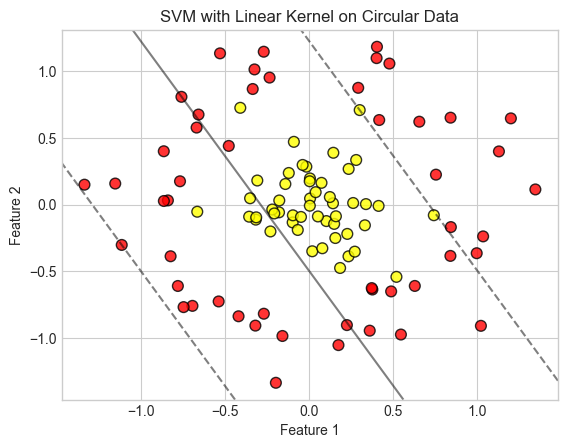

In [19]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, factor=0.2, noise=0.2, random_state=42)

clf = SVC(kernel='linear', C=1.0).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='autumn', edgecolor='black', alpha=0.8)
plot_svc_decision_function(clf, plot_support=False)
plt.title("SVM with Linear Kernel on Circular Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [20]:
# changing r = np.exp(-(X ** 2).sum(1)) to r = np.exp(-(X ** 3).sum(1))
# plotting scatter plot more efficiently by adding labels and changing colors

In [21]:
r = np.exp(-(X ** 3).sum(1))

We can visualize this extra data dimension using a three-dimensional plot, as seen in the following figure:

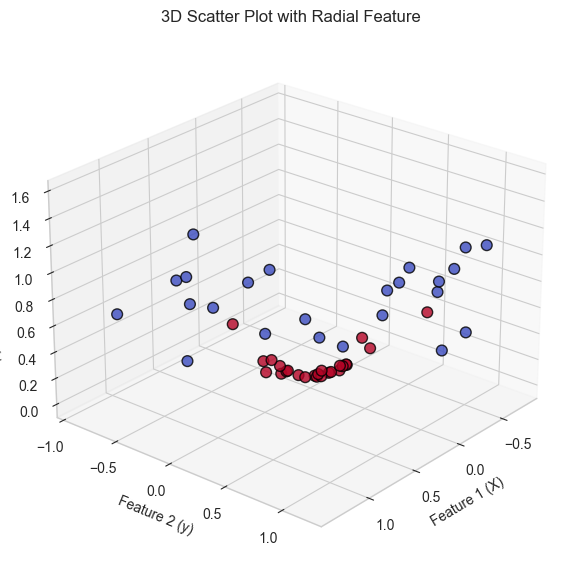

In [22]:
from mpl_toolkits.mplot3d import Axes3D

r = np.sqrt(X[:, 0]**3 + X[:, 1]**3) 

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=60, cmap='coolwarm', edgecolor='black', alpha=0.8)
ax.view_init(elev=25, azim=40)

ax.set_xlabel('Feature 1 (X)', fontsize=10)
ax.set_ylabel('Feature 2 (y)', fontsize=10)
ax.set_zlabel('Radial Distance (r)', fontsize=10)

ax.set_title('3D Scatter Plot with Radial Feature', fontsize=12)

plt.show()

By adding an extra dimension, the data becomes easily linearly separable using a separating plane. 

We needed to carefully choose and adjust our radial basis function; failing to centre it correctly would have hindered achieving clear separability. Ideally, we’d like to automatically identify the best basis functions to use.

One solution is to compute a basis function centred at each point in the dataset, allowing the Support Vector Machine (SVM) algorithm to analyze the results. This process is called kernel transformation, based on the similarity (kernel) relationship between pairs of points.

However, projecting $N$points into $N$ dimensions can be computationally intensive. Fortunately, the kernel trick allows us to fit kernel-transformed data implicitly, avoiding the need to create a full $N$ dimensional representation. This technique is a key strength of the SVM.

In Scikit-Learn, we can use a kernelized SVM by switching from a linear kernel to a radial basis function (RBF) kernel through the `kernel` hyperparameter.


In [23]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Let's use our previously defined function to visualize the fit and identify the support vectors (see the following figure):

In [24]:
# plotting scatter plot more efficiently by adding labels and changing colors
# changing s=50 to s=60 in first line 
# changing s=300 to s=200 in scatter plot 

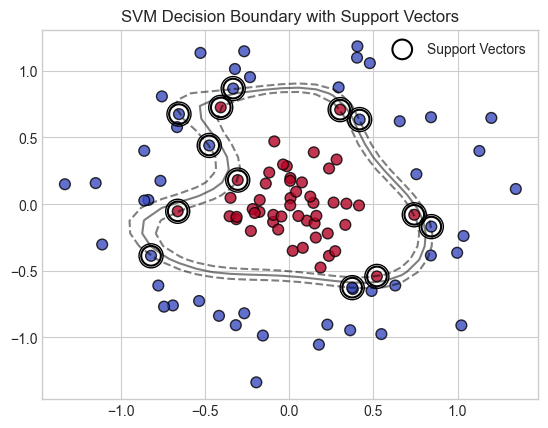

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='coolwarm', edgecolor='black', alpha=0.8)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, linewidth=1.5, edgecolors='black', facecolors='none', label='Support Vectors')
plt.title('SVM Decision Boundary with Support Vectors')
plt.legend()
plt.show()

By utilizing a kernelized support vector machine, we can learn an appropriate nonlinear decision boundary. This kernel transformation strategy is frequently employed in machine learning to convert efficient linear methods into equally efficient nonlinear methods, particularly in models where the kernel trick is applicable.

### Tuning the SVM: Softening Margins

Our discussion thus far has centered around very clean datasets, in which a perfect decision boundary exists.
But what if your data has some amount of overlap?
For example, you may have data like this (see the following figure):

In [26]:
# plotting scatter plot more efficiently by adding labels and changing colors
# changing n_samples=100 to n_samples=200

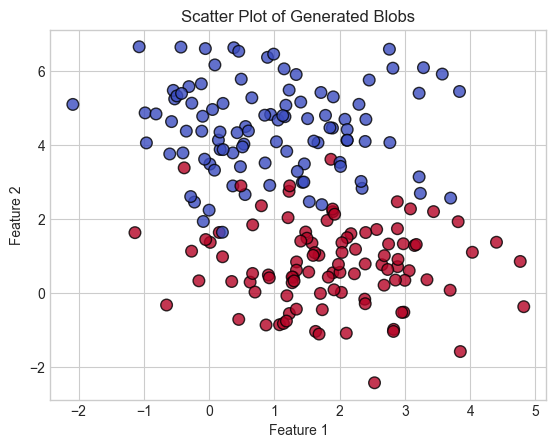

In [27]:
X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='coolwarm', edgecolor='black', alpha=0.8)
plt.title("Scatter Plot of Generated Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

To handle this case, the SVM implementation has a bit of a fudge factor that "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit.
The hardness of the margin is controlled by a tuning parameter, most often known as `C`.
For a very large `C`, the margin is hard, and points cannot lie in it.
For a smaller `C`, the margin is softer and can grow to encompass some points.

The plot shown in the following figure gives a visual picture of how a changing `C` affects the final fit via the softening of the margin:

In [28]:
# changing n_samples=100 to n_samples=200
# changing cluster_std=0.8 to cluster_std=0.6

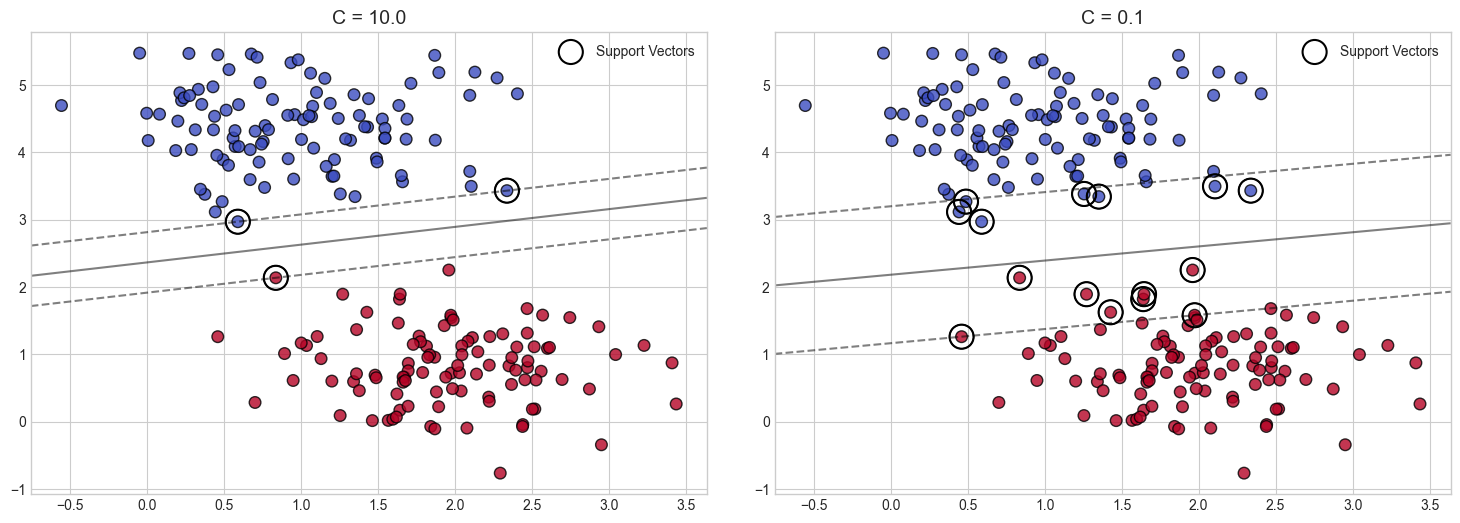

In [29]:
X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='coolwarm', edgecolor='black', alpha=0.8)
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=300, lw=1.5, edgecolors='black', facecolors='none', label='Support Vectors')
    axi.set_title(f'C = {C:.1f}', size=14)
    axi.legend()
plt.show()

## Example: Implementation of SVM using Iris Dataset

As an example of support vector machines in action, let's take a look at the classification of iris dataset.
A fetcher for the dataset is built into Scikit-Learn:

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [31]:
# Loading Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [32]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Basic SVM Model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

SVC()

In [34]:
# Predictioning accuracy
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Basic SVM Accuracy: {accuracy:.2f}")

Basic SVM Accuracy: 1.00


In [35]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [36]:
# Best hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [37]:
# Evaluating Best Model
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best SVM Accuracy after Hyperparameter Tuning: {accuracy_best:.2f}")

Best SVM Accuracy after Hyperparameter Tuning: 1.00


In [38]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best, target_names=iris.target_names))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



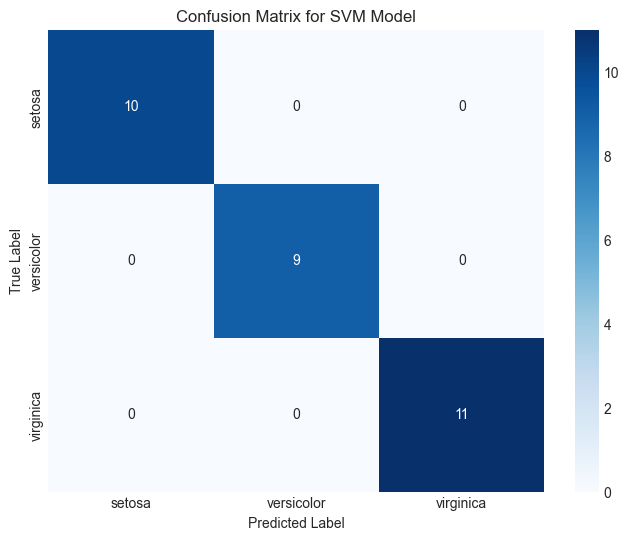

In [39]:
# Confusion Matrix 
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [40]:
# Step 6: Cross-Validation Scores
cross_val_scores = cross_val_score(best_svm, X, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {cross_val_scores.mean():.2f}")

Cross-Validation Accuracy Scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean Cross-Validation Accuracy: 0.98


## Summary

This introduction highlights the principles of support vector machines (SVMs), which are effective classification methods for several reasons:

- They use a small number of support vectors, making them compact and memory-efficient.
- Predictions are fast once the model is trained.
- They perform well with high-dimensional data, even when there are more dimensions than samples.
- Their integration with kernel methods allows for versatility with various data types.

However, SVMs have drawbacks:

- Computational complexity can scale as $\mathcal{O}[N^3]$ at worst, making them costly with large datasets.
- Their performance is sensitive to the choice of the softening parameter $\(C\)$, requiring careful cross-validation.
- They do not directly provide probabilistic interpretations, although this can be estimated at an additional cost.